# Modelo de Regressão (CinemaTicketRef Dataset)

### Objetivo:
Tentar prever o preço total de vendas com base em outras variáveis

In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn

pd.set_option('float_format', '{:f}'.format)

df = pd.read_csv('datasets/cinematicket_ref.csv', sep=",", header=0)

display(df.head(10))

# removendo string data, pois so tem filmes de 2018, e temos month, quarter, day em outras colunas
df = df.drop(['date'], axis=1)


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.260000,150000.000000,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.080000,80000.000000,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.000000,80000.000000,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.010000,100000.000000,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.670000,80000.000000,15,89.982004,2018-05-05,5,2,5
5,1492,71,1050000,7,0,3,0.980000,150000.000000,7,714.285714,2018-05-05,5,2,5
6,1492,163,1020000,10,0,3,7.690000,102000.000000,10,130.039012,2018-05-05,5,2,5
7,1492,450,750000,5,0,3,1.570000,150000.000000,5,318.471338,2018-05-05,5,2,5
8,1492,51,750000,11,0,2,0.950000,68181.818182,11,1157.894737,2018-05-05,5,2,5
9,1492,522,600000,4,0,3,1.550000,150000.000000,4,258.064516,2018-05-05,5,2,5


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  month         142524 non-null  int64  
 11  quarter       142524 non-null  int64  
 12  day           142524 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 14.1 MB


In [433]:
display(df.describe())

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,12347275.407531,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,30654858.289367,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,20000.000000,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1260000.000000,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3720000.000000,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,11100000.000000,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1262819994.000000,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


### Tratamento de dados

procurando celulas vazias

In [434]:

missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print('porcentagem de valores faltando', (total_missing/total_cells) * 100)

print(df.isnull().sum())

porcentagem de valores faltando 0.013493004147209754
film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
month             0
quarter           0
day               0
dtype: int64


preenchendo as celulas vazias com a media de cada coluna

In [435]:
# vamos preencher celulas vazias com a media de cada coluna

mean_occurrence = df['occu_perc'].mean()
mean_capacity = df['capacity'].mean()

df['occu_perc'].fillna(mean_occurrence, inplace=True)
df['capacity'].fillna(mean_capacity, inplace=True)

print(df.isnull().sum())

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
month           0
quarter         0
day             0
dtype: int64


procurando valores repetidos

In [436]:
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print(df.duplicated().sum())


106
0


Quantidade de 0 e valores menores que ele

In [437]:
df.lt(0).sum()

film_code        0
cinema_code      0
total_sales      0
tickets_sold     0
tickets_out      0
show_time        0
occu_perc        0
ticket_price     0
ticket_use      61
capacity        54
month            0
quarter          0
day              0
dtype: int64

removendo valores negativos

In [438]:
df_filtered1 = df[ (df['ticket_use'] < 0) ].index
df.drop(df_filtered1, inplace=True)
df_filtered2 = df[ (df['capacity'] < 0) ].index
df.drop(df_filtered2, inplace=True)
display(df.describe())

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000
mean,1518.995580,320.290465,12344280.761396,140.129871,0.212947,3.932356,19.969464,81238.541125,139.916924,854.976741,6.778522,2.635510,16.107067
std,36.182202,159.665910,30648588.038012,279.818411,2.414722,3.056762,22.641565,33237.051484,279.609585,952.684489,2.193915,0.808551,8.950265
min,1471.000000,32.000000,20000.000000,1.000000,0.000000,1.000000,0.030000,483.870968,0.000000,10.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1270000.000000,18.000000,0.000000,2.000000,3.760000,60000.000000,18.000000,279.329609,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3720000.000000,50.000000,0.000000,3.000000,10.370000,79467.821782,50.000000,526.315789,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,11100000.000000,143.000000,0.000000,5.000000,28.190000,100000.000000,143.000000,1038.329097,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1262819994.000000,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


Histograma dos dados

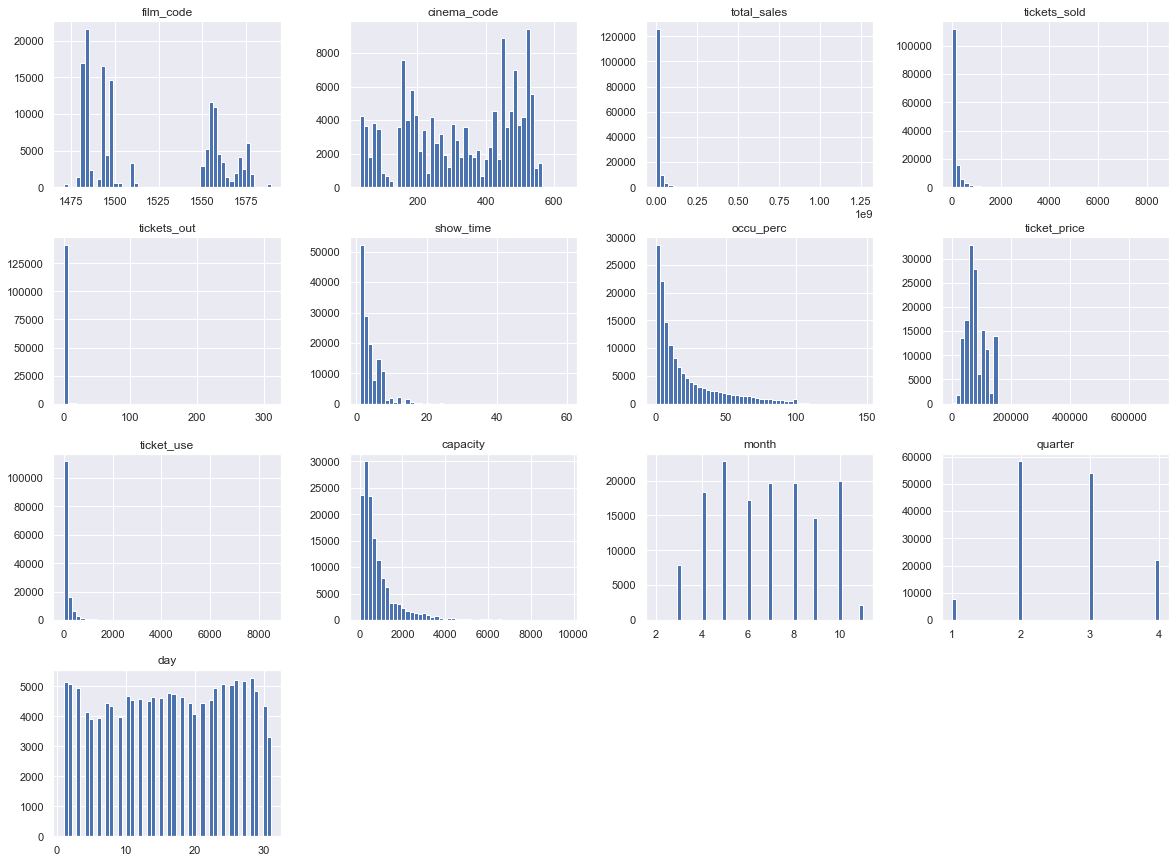

In [439]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['tickets_sold'])
plt.xlabel('total_sales')
plt.ylabel('ticket_sold')
plt.show()

plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['show_time'])
plt.xlabel('total_sales')
plt.ylabel('show_time')
plt.show()

plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['occu_perc'])
plt.xlabel('total_sales')
plt.ylabel('occu_perc')
plt.show()

plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['capacity'])
plt.xlabel('total_sales')
plt.ylabel('capacity')
plt.show()

plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['month'])
plt.xlabel('total_sales')
plt.ylabel('month')
plt.show()

### Boxplots

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
0,0.177966,0.509363,0.150271,0.075988,0.000000,0.375000,0.065009,0.965558,0.075988,0.277232,0.333333,0.333333,0.133333
1,0.177966,0.599251,0.129357,0.124620,0.000000,0.500000,0.123996,0.513506,0.124620,0.235427,0.333333,0.333333,0.133333
2,0.177966,0.855805,0.098373,0.094225,0.000000,0.375000,0.308061,0.513506,0.094225,0.069270,0.333333,0.333333,0.133333
3,0.177966,0.743446,0.045701,0.033435,0.000000,0.000000,0.169240,0.642664,0.033435,0.045714,0.333333,0.333333,0.133333
4,0.177966,0.921348,0.045701,0.042553,0.000000,0.250000,0.256640,0.513506,0.042553,0.036936,0.333333,0.333333,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105748,0.830508,0.910112,0.121611,0.072948,0.000000,0.500000,0.201359,0.813152,0.072948,0.083579,1.000000,1.000000,0.100000
105749,0.830508,0.867041,0.050349,0.063830,0.000000,0.125000,0.058833,0.384348,0.063830,0.258584,1.000000,1.000000,0.100000
105750,0.830508,0.921348,0.040279,0.021277,0.000000,0.250000,0.141291,0.852545,0.021277,0.035539,1.000000,1.000000,0.100000
105751,0.830508,0.930712,0.022463,0.012158,0.000000,0.125000,0.076436,0.771821,0.012158,0.041562,1.000000,1.000000,0.100000


None


<AxesSubplot:>

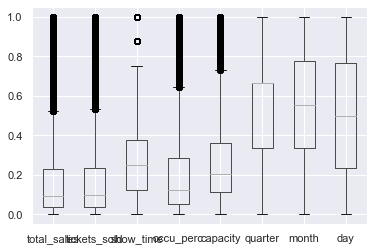

In [440]:
from pydoc import describe
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from numpy import percentile

# removendo outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

print(display(scaled_df))

scaled_df.boxplot(
    column=['total_sales', 'tickets_sold', 'show_time',  'occu_perc', 'capacity', 'quarter', 'month' , 'day'])


### Matriz de correlação

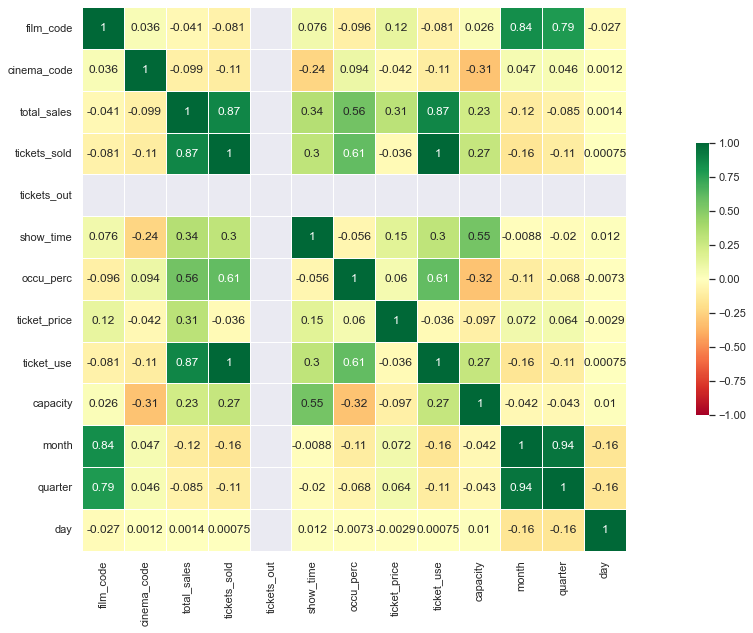

In [441]:
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(25, 10))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='RdYlGn', vmax=1,
        vmin=-1, center=0, square=True,
        linewidth=.5, cbar_kws={"shrink":.5})

plt.show()


### Removendo Ticket_use pela sua multicolinearidade

In [442]:
df = df.drop(['ticket_use'], axis=1)
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,capacity,month,quarter,day
0,1492,304,3900000,26,0,4,4.260000,150000.000000,610.328638,5,2,5
1,1492,352,3360000,42,0,5,8.080000,80000.000000,519.801980,5,2,5
2,1492,489,2560000,32,0,4,20.000000,80000.000000,160.000000,5,2,5
3,1492,429,1200000,12,0,1,11.010000,100000.000000,108.991826,5,2,5
4,1492,524,1200000,15,0,3,16.670000,80000.000000,89.982004,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
142517,1569,518,3160000,25,0,5,13.090000,126400.000000,190.985485,11,4,4
142519,1569,495,1320000,22,0,2,3.860000,60000.000000,569.948187,11,4,4
142521,1569,524,1060000,8,0,3,9.200000,132500.000000,86.956522,11,4,4
142522,1569,529,600000,5,0,2,5.000000,120000.000000,100.000000,11,4,4


# 

In [443]:
cinema={}

# ['film_code', 'cinema_code', 'ticket_price', 'show_time',  'occu_perc', 'capacity', 'quarter', 'month' , 'day']
cinema["features"] = scaled_df[['ticket_price', 'show_time',  'occu_perc', 'capacity', 'quarter', 'month' , 'day']]
cinema["target"] = scaled_df['total_sales']

print(cinema['features'].shape)
print(cinema['target'].shape)

display(cinema['features'])
display(cinema['target'])

(105753, 7)
(105753,)


,ticket_price,show_time,occu_perc,capacity,quarter,month,day
0,0.965558,0.375000,0.065009,0.277232,0.333333,0.333333,0.133333
1,0.513506,0.500000,0.123996,0.235427,0.333333,0.333333,0.133333
2,0.513506,0.375000,0.308061,0.069270,0.333333,0.333333,0.133333
3,0.642664,0.000000,0.169240,0.045714,0.333333,0.333333,0.133333
4,0.513506,0.250000,0.256640,0.036936,0.333333,0.333333,0.133333
...,...,...,...,...,...,...,...
105748,0.813152,0.500000,0.201359,0.083579,1.000000,1.000000,0.100000
105749,0.384348,0.125000,0.058833,0.258584,1.000000,1.000000,0.100000
105750,0.852545,0.250000,0.141291,0.035539,1.000000,1.000000,0.100000
105751,0.771821,0.125000,0.076436,0.041562,1.000000,1.000000,0.100000


0        0.150271
1        0.129357
2        0.098373
3        0.045701
4        0.045701
           ...   
105748   0.121611
105749   0.050349
105750   0.040279
105751   0.022463
105752   0.008908
Name: total_sales, Length: 105753, dtype: float64

Utilizando o modelo Gaussiano podemos observar que 68% do total sales fica de -18301689.16 a 42973469.84

In [444]:

print(df['total_sales'].describe())

print(np.mean(df['total_sales']) - np.std(df['total_sales']))
print(np.mean(df['total_sales'] + np.std(df['total_sales'])))

count     105753.000000
mean     4473531.090532
std      5142278.454931
min        20000.000000
25%       960000.000000
50%      2400000.000000
75%      6000000.000000
max     25840000.000000
Name: total_sales, dtype: float64
-668723.0516580828
9615785.232736262


### Observando mais sobre o total sales

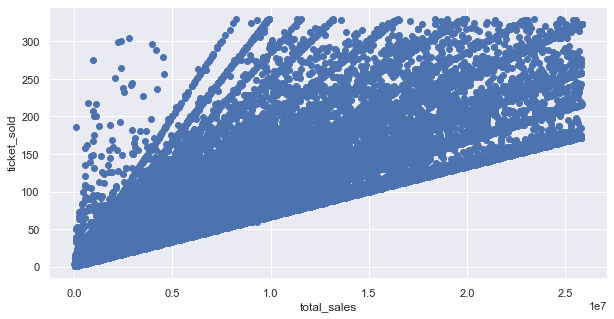

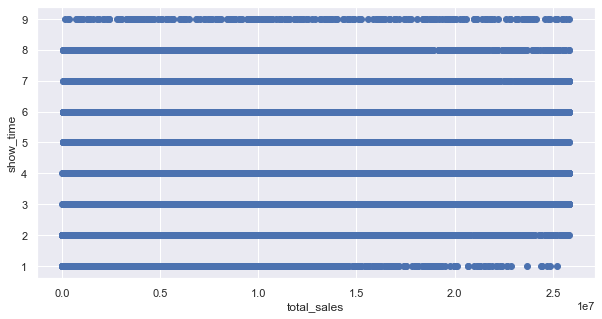

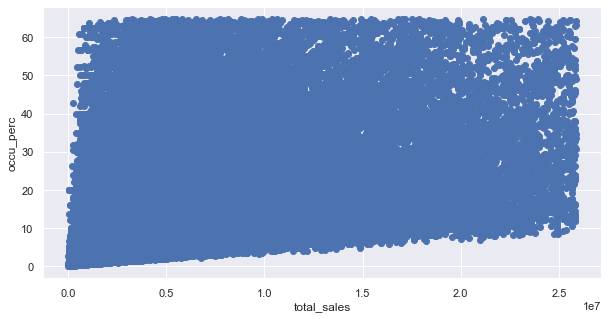

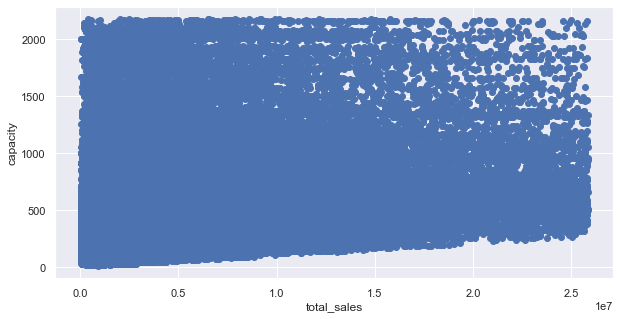

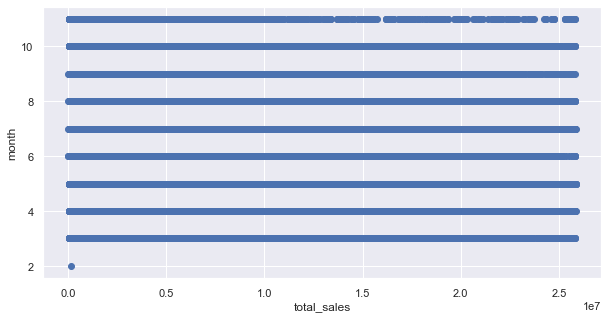

### Aplicando Regressão linear

Mean squared error: 0.015360
Mean absolute error: 0.083870
Root Mean squared error: 0.123934
R2 score: 0.609274
Coefficients: 
 [ 0.2944773   0.09493915  0.61844825  0.38976368  0.07477971 -0.12445524
 -0.00343297]
Intercept: 
 -0.2029148037260755
Score: 
 0.6092739433849343
scores: 
 [-0.01483333 -0.01560633 -0.01575834 -0.01556595 -0.01509831 -0.01547064
 -0.01525147]
scores mean:  -0.015369195588545746
scores std:  0.0003002494425291811


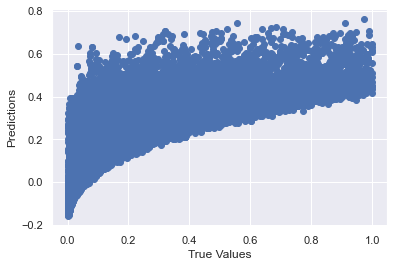

In [446]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(cinema['features'], cinema['target'], test_size=0.3)

# train the model
model = LinearRegression()
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))


print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('Score: \n', model.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_test, y_test, cv=7, scoring='neg_mean_squared_error')
print('scores: \n', scores)

print('scores mean: ', scores.mean())
print('scores std: ', scores.std())

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### Utilizando outros modelos de Regressão Linear para verificar o resultado

In [447]:
def norma_l2(X):
    X = X.astype(float)
    X = X - np.mean(X, axis=0)
    X = X / np.linalg.norm(X, axis=0)
    return X

### Lasso Regression

In [448]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.01)
ls_scores = cross_val_score(ls, norma_l2(cinema["features"]), cinema["target"], cv=7, error_score="raise")

print('ls score: ', ls_scores.mean())


ls score:  -0.021404402555839308


### Ridge Regression

In [449]:
from sklearn.linear_model import Ridge


rg = Ridge(alpha=0.05)
lr = LinearRegression()

lr_scores = cross_val_score(lr, norma_l2(cinema["features"]), cinema["target"], cv=7)
print(lr_scores)
print('lr mean scores: ', lr_scores.mean())

rg_scores = cross_val_score(rg, norma_l2(cinema["features"]), cinema["target"], cv=7)
print('rg mean scores: ', rg_scores.mean())

from sklearn.linear_model import RidgeCV

rg = RidgeCV(alphas=(1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025))
rg.fit(norma_l2(cinema["features"]), cinema["target"])

print('rg alpha: ', rg.alpha_)

[0.58443386 0.5515735  0.58585393 0.61871297 0.58673877 0.63947091
 0.62587218]
lr mean scores:  0.5989508739305862
rg mean scores:  0.5960247812467886
rg alpha:  0.00025


### ElasticNet Regression

In [450]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

en = ElasticNet(alpha=0.001, l1_ratio=0.8)
en_scores = cross_val_score(en, norma_l2(cinema["features"]), cinema["target"], cv=10)

print('ElasticNet mean scores: ',en_scores.mean())

encv = ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8))
encv.fit(norma_l2(cinema["features"]), cinema["target"])

print(encv.alpha_)
print(encv.l1_ratio_)

ElasticNet mean scores:  -0.025129776944172844
0.001
0.1


### Polinomial

#### Polinomial grau 2

score:  0.9524011199015942
Coefficients:  [-1.33724472e-19 -4.34207309e-02 -9.68286013e-02 -4.45572216e-01
 -3.32617120e-01 -1.13505587e-01  1.65712900e-01  8.20876904e-03
 -6.17112375e-02  1.79049095e-01  1.07628174e+00  8.75833014e-01
  1.47029224e-01 -2.16683557e-01 -9.18764397e-03 -4.82050230e-02
  1.01067240e-01  9.34575425e-02 -1.10218192e-02  1.61789773e-02
  3.14388614e-04 -7.28912115e-02  3.82357641e+00 -6.54869018e-03
 -1.69936449e-02 -4.83533501e-03 -8.89147928e-02  1.68746949e-02
 -4.83226267e-02 -6.51941465e-03 -3.58577215e-02  1.14565635e-01
  2.49150943e-02 -8.59822562e-02 -2.89153189e-02  3.60881721e-04]
Intercept:  0.02016430395519858
Mean squared error: 0.001881
Mean absolute error: 0.023588
Root Mean squared error: 0.043373
R2 score: 0.952401


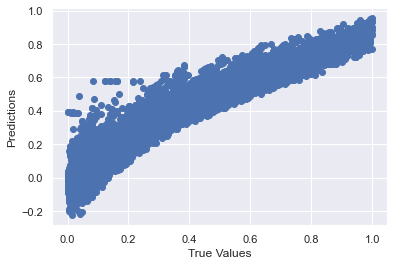

In [451]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures

cinema["features"] = scaled_df[['ticket_price', 'show_time',  'occu_perc', 'capacity', 'quarter', 'month' , 'day']]
cinema["target"] = scaled_df['total_sales']

x_train, x_test, y_train, y_test = train_test_split(cinema['features'], cinema['target'], test_size=0.3)

poly_reg2 = PolynomialFeatures(degree=2)

x_poly = poly_reg2.fit_transform(cinema['features'])

regressor = LinearRegression()

regressor.fit(x_poly, cinema['target'])

y_pred = regressor.predict(poly_reg2.fit_transform(x_test))


print('score: ', regressor.score(poly_reg2.fit_transform(x_test), y_test))

print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


#### Polinomial grau 3

score:  0.9951199725194199
Coefficients:  [-8.80095793e+01  1.64868400e-02 -2.31363484e-02  3.29834816e-02
  4.04382501e-02 -2.56014820e+04  2.56014700e+04 -1.03525377e-02
 -3.65469044e-02  6.48071966e-02  2.53766959e-03 -7.39034077e-02
 -6.48344085e-03  2.84483241e-02  4.71428737e-03 -1.84125206e-02
  4.60775760e-02  9.53154771e-02 -2.58204170e-03 -2.17836723e-02
 -2.46708343e-02 -4.55881845e-02 -2.14039227e-01  9.57589231e-03
  4.51645069e-03  1.19575355e-02 -7.90323477e-02  2.81815031e-03
  1.74040874e-02  2.41856735e-02 -3.85058967e-02  8.49590274e-02
  2.03485487e-02 -4.22672170e-02 -8.99760463e-03  1.12128935e-02
  1.84980465e-02 -1.00452390e-02  5.02345280e-03  1.17509879e-02
 -8.83884437e-03  1.39689464e-02  3.11910987e-03 -2.24483791e-02
  2.23577247e-02  3.58367552e-02  2.03309738e-02 -9.22264332e-02
 -1.85236437e-03  1.93751221e-02  8.38779740e+00 -1.30227626e-02
  3.40126503e-02 -3.02223086e-03 -2.88494556e-03 -2.69350527e-02
  1.14223683e-01  1.59431550e-03 -9.31629138e-02

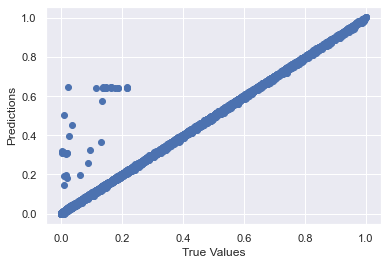

In [452]:
x_train, x_test, y_train, y_test = train_test_split(cinema['features'], cinema['target'], test_size=0.3)

poly_reg4 = PolynomialFeatures(degree=3)

x_poly = poly_reg4.fit_transform(cinema['features'])

regressor = LinearRegression()

regressor.fit(x_poly, cinema['target'])

y_pred = regressor.predict(poly_reg4.fit_transform(x_test))


print('score: ', regressor.score(poly_reg4.fit_transform(x_test), y_test))

print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

Text(0.5, 1.0, 'MSE VS Degree')

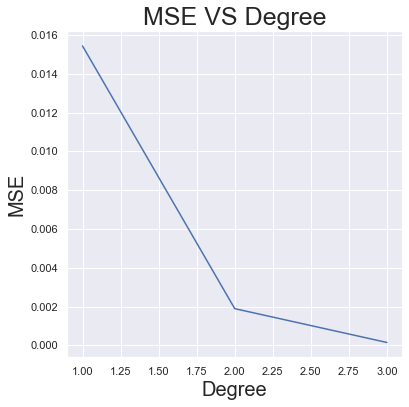

In [453]:
from sklearn.model_selection import cross_validate

x_train, x_test, y_train, y_test = train_test_split(cinema['features'], cinema['target'], test_size=0.3)

maxdegree=4
training_error=[]
cross_validation_error=[]
for d in range(1,maxdegree):
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(x_train)
    x_poly_test=PolynomialFeatures(degree=d).fit_transform(x_test)
    lr=LinearRegression(fit_intercept=False)
    model=model.fit(x_poly_train,y_train)
    y_train_pred=model.predict(x_poly_train)
    mse_train=mean_squared_error(y_train,y_train_pred)
    cve=cross_validate(lr,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=5,return_train_score=True)
    training_error.append(mse_train)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))
    
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,maxdegree),cross_validation_error)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
ax.set_title('MSE VS Degree',fontsize=25)